<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/12_Implementation_Perspective_of_Perceptron_in_Modern_Applications_(Practical_Use_Cases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12 Implementation: Perspective of Perceptron in Modern Applications (Practical Use Cases)


- The Perceptron algorithm, though basic, has several practical applications where its simplicity and efficiency are ideal.

- While more complex models like deep neural networks and ensemble methods have become dominant, the Perceptron is still relevant in certain cases, especially when linear classification is sufficient or computational resources are limited

## Step 1: Practical Applications of the Perceptron



### 1. **Spam Detection**:

Spam detection is a classic example of **binary classification**. In this case, emails or messages are classified as either **spam** (irrelevant, potentially harmful) or **not spam** (important). The Perceptron is well-suited for spam detection tasks where the input features are relatively simple, such as the frequency of specific words or the presence of certain phrases commonly found in spam emails.

##### Example Features for Spam Detection:
- **Word Frequency**: How often certain words like "free," "money," "win," etc., appear in the email.
- **Presence of Keywords**: Binary features indicating whether specific words are present or absent.
- **Email Structure**: Features that represent characteristics like the number of links, length of the email, and attachment size.

##### Why the Perceptron Works:
- If spam emails are consistently associated with certain words or phrases, the decision boundary created by the Perceptron can effectively separate spam from non-spam.
- In cases where the spam/non-spam classification is mostly linearly separable based on these basic features, the Perceptron can perform quickly and with decent accuracy.

##### Limitations:
- As spam detection becomes more sophisticated and spammers use more complex, obfuscated language, a linear decision boundary may not suffice. Advanced models like **Logistic Regression**, **Support Vector Machines (SVM)**, or **deep learning** might be needed in those cases.

##### Use Case:
Small organizations or individual users who want **real-time filtering** of spam emails with minimal computational cost may still rely on the Perceptron in their systems.


#### Implementation

In [3]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Sample email dataset for spam detection
emails = [
    "Buy cheap products now",            # Spam
    "Get your free gift card",           # Spam
    "Meeting at 10 am tomorrow",         # Not Spam
    "Please review the attached document",  # Not Spam
    "Limited time offer! Buy now",       # Spam
    "Let's schedule a call next week",   # Not Spam
    "Exclusive offer just for you",      # Spam
    "The report is ready for review"     # Not Spam
]

# Labels: 1 for Spam, 0 for Not Spam
labels = [1, 1, 0, 0, 1, 0, 1, 0]

# Step 1: Preprocessing - Convert the text into numerical features using Bag-of-Words
vectorizer = CountVectorizer()  # Converts text to feature vectors based on word frequency

X = vectorizer.fit_transform(emails).toarray()  # Extract the word frequency features
print("Word Features:\n", vectorizer.get_feature_names_out())
print("Transformed Features:\n", X)

# Step 2: Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Step 3: Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = perceptron.predict(X_test)

# Step 5: Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPerceptron accuracy on test data: {accuracy * 100:.2f}%")

# Print actual vs predicted labels
print("\nActual labels:", y_test)
print("Predicted labels:", y_pred)


Word Features:
 ['10' 'am' 'at' 'attached' 'buy' 'call' 'card' 'cheap' 'document'
 'exclusive' 'for' 'free' 'get' 'gift' 'is' 'just' 'let' 'limited'
 'meeting' 'next' 'now' 'offer' 'please' 'products' 'ready' 'report'
 'review' 'schedule' 'the' 'time' 'tomorrow' 'week' 'you' 'your']
Transformed Features:
 [[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0]]

Perceptron accuracy on test data: 66.67%

Actual labels: [1, 0, 1]
Predicted labels: [0 0 1]


#### Observations:


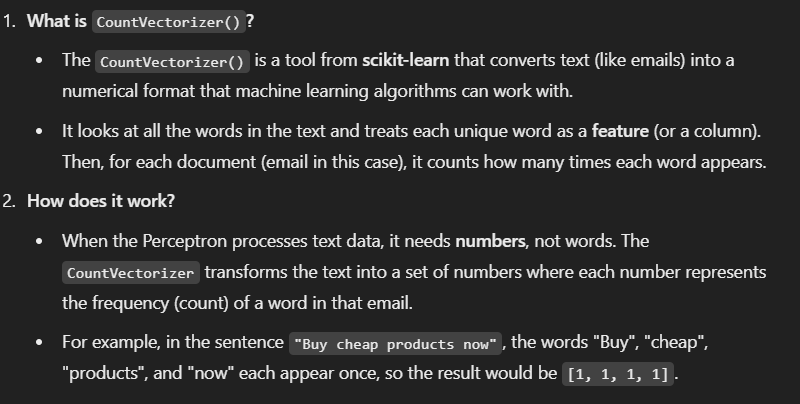

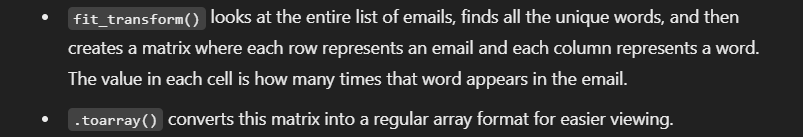

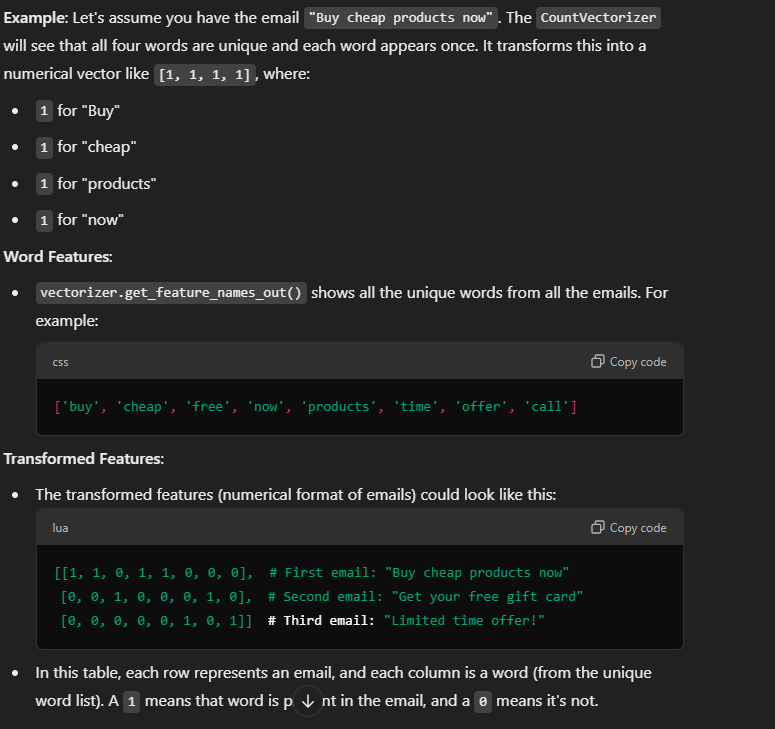


### 2. **Sentiment Analysis**:

**Sentiment analysis** refers to classifying text as expressing **positive**, **negative**, or **neutral** sentiments. This is commonly used in analyzing customer reviews, social media posts, and other user-generated content.

##### Example Features for Sentiment Analysis:
- **Term Frequency**: The occurrence of positive words (e.g., "good," "love," "great") and negative words (e.g., "bad," "hate," "awful").
- **Bag-of-Words Representation**: A simple vector representation of the text where each element represents the frequency of a word in the text.
- **Presence of Emotion Indicators**: Binary features that indicate whether certain emoticons or punctuation (like "!!" or ":)") are present.

##### Why the Perceptron Works:
- In cases where sentiment can be reasonably separated into positive and negative classes based on the presence or absence of certain terms, the Perceptron can quickly create a decision boundary that separates these classes.
- It's computationally efficient, which means it can be used to process a large amount of text in real-time or near real-time.

##### Limitations:
- Like spam detection, sentiment analysis can sometimes involve non-linear decision boundaries, especially when the sentiment of a text depends on complex word combinations or sarcasm. In these cases, more advanced models like **Recurrent Neural Networks (RNNs)**, **Transformers**, or **BERT** models are more effective.

##### Use Case:
A **lightweight application** for quick sentiment analysis of social media streams, reviews, or customer feedback might use the Perceptron to provide instant results without the need for deep learning models.


#### Implementation

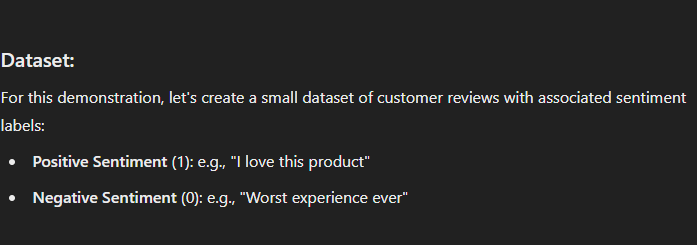

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Step 1: Prepare the dataset (Text reviews and their corresponding sentiment labels)
texts = [
    "I love this product",  # Positive
    "Terrible service",     # Negative
    "Had a great time",     # Positive
    "Worst experience ever",# Negative
    "This is fantastic",    # Positive
    "I hate this",          # Negative
    "Excellent quality",    # Positive
    "Not worth the money",  # Negative
]

# Labels for the reviews: 1 for positive sentiment, 0 for negative sentiment
labels = [1, 0, 1, 0, 1, 0, 1, 0]

# Step 2: Feature extraction using Bag of Words (BoW)
vectorizer = CountVectorizer()  # Initialize the CountVectorizer
X = vectorizer.fit_transform(texts).toarray()  # Convert text to BoW representation

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=42)

# Step 3: Train the Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Sentiment Analysis Accuracy: {accuracy * 100:.2f}%")

# Optional: Check predictions for new, unseen reviews
new_reviews = ["This product is amazing", "I will never buy this again"]
new_reviews_transformed = vectorizer.transform(new_reviews).toarray()  # Convert new reviews to BoW format
new_predictions = perceptron.predict(new_reviews_transformed)
print(f"Sentiment predictions for new reviews: {new_predictions}")  # 1 = positive, 0 = negative


Perceptron Sentiment Analysis Accuracy: 25.00%
Sentiment predictions for new reviews: [1 1]



### 3. **Recommendation Systems**:

The Perceptron can also be used in **simple recommendation systems**, where the task is to classify items (e.g., products, movies, or songs) as recommended or not recommended for a user. This can be based on basic features such as user preferences, item ratings, or past interactions.

##### Example Features for Recommendation Systems:
- **User Preferences**: Whether the user has previously interacted with similar items.
- **Ratings**: A binary classification of whether the item has been highly rated by similar users.
- **Content Features**: Characteristics of the item, such as genre (for movies), type (for products), or artist (for songs).

##### Why the Perceptron Works:
- If user preferences and content-based features are sufficient to linearly separate items into "liked" or "disliked," the Perceptron can quickly make recommendations based on these features.
- In cases where the feature space is simple and mostly linearly separable, the Perceptron offers an efficient way to classify items.

##### Limitations:
- Modern recommendation systems often rely on collaborative filtering, matrix factorization, and **deep learning** models to capture non-linear relationships between users and items. The Perceptron may fall short when the recommendation task requires understanding more complex interactions between users and items.

##### Use Case:
A **basic recommendation system** for small e-commerce platforms or content providers can use the Perceptron for quick recommendations based on user activity and product features.



#### Implementation

Note: we use dataset which is available from grouplens

- You can download the file from https://grouplens.org/datasets/movielens/100k/
- url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
- url_movies = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.item'

- These files has been included in the repository, please find it in 'datasets' folder

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Step 1: Load the MovieLens dataset (small dataset - 100k ratings)

# Load the data into a pandas DataFrame
columns = ['user_id', 'movie_id', 'rating', 'timestamp']

ratings = pd.read_csv('u.data.txt', sep='\t', names=columns)  # No need to specify column names if headers are present


# Load the movie information
movies_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('u.item.txt', sep='|', names=movies_columns, encoding='latin-1')

# Merge the datasets to get movie information with ratings
data = pd.merge(ratings, movies[['movie_id', 'title', 'Comedy', 'Drama', 'Action', 'Sci-Fi']], on='movie_id')


In [13]:

# Step 2: Preprocessing
# We'll classify movies as "liked" (1) if the rating is above 3.5, and "not liked" (0) otherwise
data['liked'] = np.where(data['rating'] > 3.5, 1, 0)

# Select features: We'll use the movie genres and movie ID as features
# For simplicity, we're using binary genre features (e.g., Comedy, Drama, Action)
features = ['Comedy', 'Drama', 'Action', 'Sci-Fi']
X = data[features].values  # Features (genres)
y = data['liked'].values   # Target (1 for liked, 0 for not liked)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Perceptron Model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = perceptron.predict(X_test)

# Step 6: Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron accuracy: {accuracy * 100:.2f}%")



Perceptron accuracy: 45.32%


#### Observations

The accuracy received here is 45.32%

##### Strategies to Improve the Accuracy:

###### 1. **Include More Features**

Currently, the model is only using a few genre features (Comedy, Drama, Action, Sci-Fi). These features may not be sufficient to capture the complexity of user preferences. You can improve the model by adding more informative features, such as:
- **User-specific data**: Average user rating, how often a user rates a movie positively, etc.
- **Movie metadata**: Runtime, release year, director, or actor information.
- **User-movie interaction**: Number of times a user has watched a similar movie, or collaborative filtering features.

###### Implementation:

We can include more genres and additional features from the dataset such as movie release date, user-specific information, etc.

```python
# Adding more genres from the dataset
features = ['Comedy', 'Drama', 'Action', 'Sci-Fi', 'Romance', 'Thriller', 'Horror']

# You can also add user-specific information such as average user rating, etc.
# Example: Adding user-specific features (e.g., average rating per user)
user_avg_rating = data.groupby('user_id')['rating'].mean()
data = pd.merge(data, user_avg_rating, on='user_id', suffixes=('', '_user_avg'))

# Include user-specific features in the feature set
features = ['Comedy', 'Drama', 'Action', 'Sci-Fi', 'Romance', 'Thriller', 'Horror', 'rating_user_avg']

X = data[features].values  # New feature set with more genres and user-specific features
```

---

###### 2. **Normalize the Data**

Normalization can often improve the performance of a model by ensuring that features are on the same scale. This can be particularly important when some features (e.g., user average rating) have a much larger range than others (e.g., binary genre features).

###### Implementation:

```python
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

---

###### 3. **Tune Hyperparameters**

The default **learning rate** of the Perceptron and the number of **epochs** (iterations over the training data) can affect its performance. You can tune these hyperparameters to improve convergence and accuracy. If the learning rate is too large or too small, the model may fail to converge.

##### Implementation:

```python
# Tune learning rate and number of iterations (max_iter)
perceptron = Perceptron(max_iter=2000, eta0=0.001, random_state=42)
perceptron.fit(X_train, y_train)
```

You can try different values for `eta0` (learning rate) and `max_iter` (number of iterations) using **grid search** or manually testing different values.

---

###### 4. **Increase Training Data**

More data can help the model generalize better. If you have more user-movie rating data, adding this can increase the diversity and richness of patterns the model can learn. You may also consider **data augmentation** techniques, such as generating synthetic user interactions or using **cross-validation** to make the most of the existing data.

---

###### 5. **Use Cross-Validation**

Cross-validation can help ensure that the model generalizes well to unseen data. This will also help prevent overfitting. You can use **k-fold cross-validation** to get a more accurate measure of model performance.

##### Implementation:

```python
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(perceptron, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean() * 100:.2f}%")
```

---

###### 6. **Consider a Non-Linear Model (e.g., SVM)**

The Perceptron is a **linear classifier** and may not be suitable if the relationship between the features and the target variable is non-linear. Consider switching to more advanced models like **Support Vector Machines (SVM)**, **Random Forest**, or even simple **logistic regression**. These models can capture more complex relationships between features.

####### Example with Logistic Regression:

```python
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model instead of Perceptron
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression accuracy: {accuracy * 100:.2f}%")
```

---

###### 7. **Add Polynomial Features (For Perceptron)**

If you want to stick with the Perceptron but suspect the problem is not linearly separable, you can add **polynomial features** to the dataset. This can capture non-linear relationships between the features.

##### Implementation:

```python
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Perceptron on polynomial features
perceptron_poly = Perceptron(max_iter=1000, random_state=42)
perceptron_poly.fit(X_train_poly, y_train)

# Test the model
y_pred_poly = perceptron_poly.predict(X_test_poly)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Perceptron with polynomial features accuracy: {accuracy_poly * 100:.2f}%")
```



### Why Use the Perceptron in These Applications?

While more sophisticated models exist, the Perceptron offers several advantages in specific scenarios:
1. **Simplicity**: The Perceptron is easy to understand, implement, and interpret. Its weight vector directly shows the influence of each feature on the decision boundary.
   
2. **Computational Efficiency**: The time complexity of training a Perceptron is **O(N × d × T)**, where **N** is the number of samples, **d** is the number of features, and **T** is the number of epochs. This makes it highly efficient compared to more complex models like deep neural networks.

3. **Low Resource Requirements**: In situations where computational resources are limited (e.g., embedded systems, mobile devices, or real-time applications), the Perceptron provides a good trade-off between performance and resource consumption.

4. **When Linear Separation is Sufficient**: In many practical cases, data can be linearly separable or close to linearly separable, especially when using well-designed features. In such cases, the Perceptron offers a quick solution without overcomplicating the model.


## Step 2: Perceptron in Preprocessing Pipelines


In modern machine learning workflows, preprocessing data effectively is crucial for improving the performance of complex models. Perceptron, despite being a simple linear classifier, can play an important role in preprocessing pipelines, particularly for feature selection and dimensionality reduction.



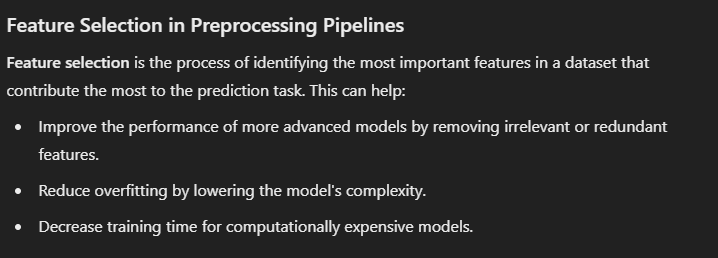

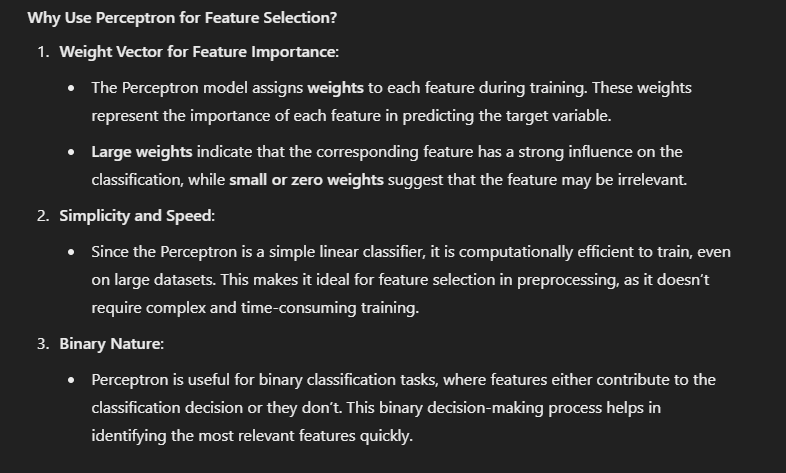

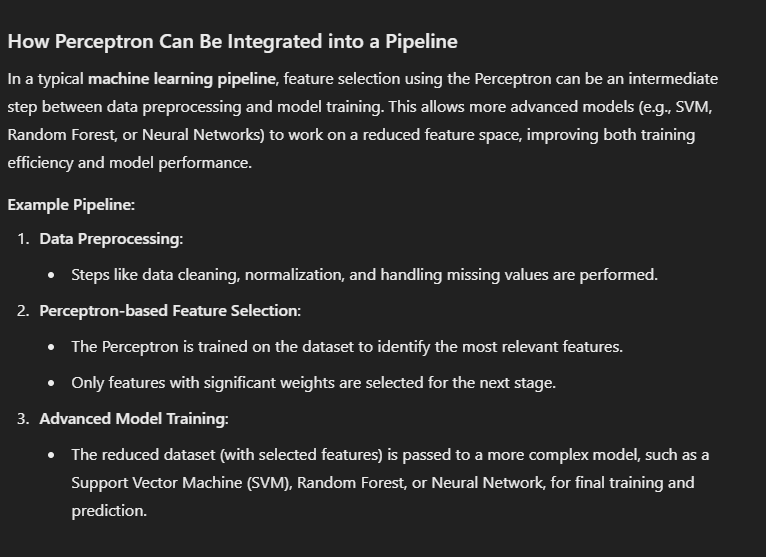

#### Python Implementation of Perceptron for Feature Selection


In [5]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Create a synthetic dataset
# make_classification() generates a dataset with 1000 samples, 20 features, and a binary target (y). Out of the 20 features, 10 are informative and 10 are redundant. This allows us to see how well the Perceptron identifies relevant features.
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_classes=2, random_state=42)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the Perceptron for feature selection
# Initialize the Perceptron model with a maximum of 1000 iterations
perceptron = Perceptron(max_iter=1000, random_state=42)
# Train the Perceptron using the training dataset
perceptron.fit(X_train, y_train)

# Step 3: Get the feature importance from the Perceptron weights
# After training, the Perceptron assigns weights to each feature. These weights can be interpreted
# as feature importance. Higher absolute values of the weights indicate more important features.
feature_weights = np.abs(perceptron.coef_[0])
print("Feature Weights from Perceptron:", feature_weights)

# Step 4: Select features with weights above a threshold
# Define a threshold to filter important features. Features with weights greater than 0.1
# are considered important, and others are discarded.
threshold = 0.6 # This threshold can be tuned
selected_features = feature_weights > threshold
# Select the features from both the training and testing sets based on the identified important features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Print how many features were selected based on the threshold
print(f"Number of selected features: {np.sum(selected_features)}")

# Step 5: Train a more advanced model (e.g., Random Forest) using selected features
# Now we use the filtered feature set to train a Random Forest classifier, which is more powerful
# than a Perceptron but benefits from the reduced feature set.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)

# Step 6: Evaluate the model's performance
# Predict the outcomes on the test set using the trained Random Forest model
y_pred = rf.predict(X_test_selected)
# Calculate the accuracy score based on the test predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest with selected features: {accuracy * 100:.2f}%")


Feature Weights from Perceptron: [ 1.00770222  1.65147685 10.85177271  7.32075819  2.65665111 19.92731968
  7.82684017  0.19145062  0.76528582  4.3760004  10.95109941  1.42366317
 17.57697929 13.58737762 10.38795663 10.49214455 10.67067951  6.67977806
 11.27313256  2.41598795]
Number of selected features: 19
Accuracy of Random Forest with selected features: 93.33%


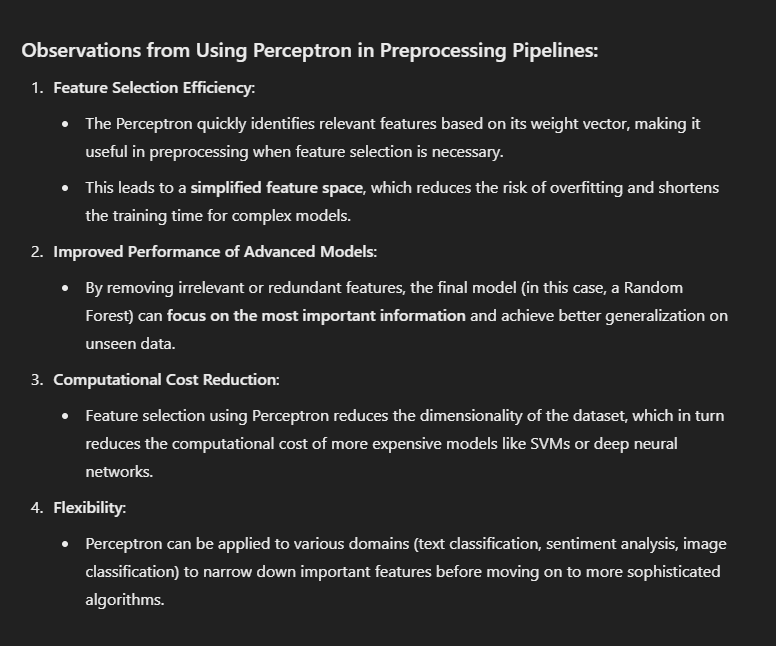

#### Observation 2:


Threshold: 0.0000, Number of selected features: 20, Accuracy: 92.33%
Threshold: 1.9927, Number of selected features: 15, Accuracy: 91.67%
Threshold: 3.9855, Number of selected features: 13, Accuracy: 91.33%
Threshold: 5.9782, Number of selected features: 12, Accuracy: 90.00%
Threshold: 7.9709, Number of selected features: 9, Accuracy: 90.00%
Threshold: 9.9637, Number of selected features: 9, Accuracy: 90.00%
Threshold: 11.9564, Number of selected features: 3, Accuracy: 71.33%
Threshold: 13.9491, Number of selected features: 2, Accuracy: 69.33%
Threshold: 15.9419, Number of selected features: 2, Accuracy: 69.33%
Threshold: 17.9346, Number of selected features: 1, Accuracy: 59.33%


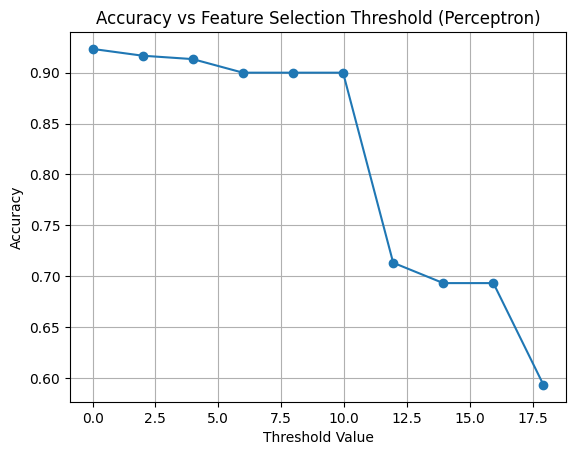

In [8]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_classes=2, random_state=42)

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the Perceptron for feature selection
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Get the absolute values of the feature weights
feature_weights = np.abs(perceptron.coef_[0])

# Step 3: Define different threshold values to test
threshold_values = np.arange(0, np.max(feature_weights), np.max(feature_weights)/10)

accuracies = []  # List to store accuracy for each threshold

# Step 4: Loop over each threshold and calculate accuracy
for threshold in threshold_values:
    # Select features based on the current threshold
    selected_features = feature_weights > threshold
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Train a Random Forest model using the selected features
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_selected, y_train)

    # Predict and calculate accuracy
    y_pred = rf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print the result for the current threshold
    print(f"Threshold: {threshold:.4f}, Number of selected features: {np.sum(selected_features)}, Accuracy: {accuracy * 100:.2f}%")

# Step 5: Plot threshold vs accuracy
plt.plot(threshold_values, accuracies, marker='o')
plt.xlabel('Threshold Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Feature Selection Threshold (Perceptron)')
plt.grid(True)
plt.show()


## Step 3: Simplicity, Interpretability, and Efficiency


**Perceptron** remains relevant in modern machine learning applications due to three critical advantages: **simplicity**, **interpretability**, and **computational efficiency**. These characteristics make it suitable for tasks where linear classification suffices, and there is a need for models that are easy to understand and computationally lightweight.

#### 1. Simplicity

The **Perceptron** is one of the simplest machine learning algorithms available. It is a linear classifier, meaning it attempts to find a **hyperplane** that separates data points into different classes. This simplicity has several benefits:
   
- **Fast and Easy to Implement**: The Perceptron consists of a single layer of weights, which makes it easy to implement and fast to train. Unlike more complex algorithms, it doesn’t require a deep understanding of advanced techniques like backpropagation, regularization, or optimization algorithms.
  
- **Minimal Computation**: Each weight update is done through simple addition and multiplication operations, making it computationally lightweight compared to models that involve iterative optimization processes (like SVM or deep neural networks). This allows the Perceptron to quickly converge on small, simple datasets.

- **Applicable for Linearly Separable Data**: The Perceptron works well in tasks where the data is linearly separable. In such cases, the Perceptron converges in a relatively small number of iterations and can quickly provide a solution.

#### Key Advantages of Simplicity:
- **Low computational overhead**: Because the Perceptron doesn't involve complex iterative processes, it is highly efficient when resources are limited.
- **Quick implementation**: Ideal for rapid prototyping, testing small-scale tasks, or when a simple baseline model is needed.



#### 2. Interpretability

A growing demand in modern machine learning is **model interpretability**, especially in areas like **healthcare**, **finance**, and **legal systems**, where understanding how decisions are made is critical. The **Perceptron** is highly interpretable for several reasons:

- **Weight-based decision-making**: The Perceptron model's predictions are directly based on a **weighted sum** of the input features. The weights associated with each feature are easy to interpret: larger weights indicate more influential features in the decision-making process.

- **Transparent decision boundary**: The Perceptron algorithm draws a **linear boundary** that separates the two classes. This boundary is easy to visualize in 2D or 3D space. With a single weight vector and bias term, you can clearly see how the algorithm determines which side of the boundary the data falls into.

- **Explanations of predictions**: Unlike black-box models like deep neural networks, the Perceptron’s decision-making process can be explained by inspecting the feature weights. For example, in a spam detection system, if certain words (features) have large positive weights, it indicates they are strong indicators of spam. Conversely, negative weights suggest those words are strong indicators of non-spam.

#### Example of Interpretability:

Consider a **sentiment analysis** task where we use a Perceptron to classify text as positive or negative. After training, the model assigns weights to words. For example:
- Words like "good" or "excellent" may receive **positive weights**, meaning their presence increases the likelihood of a positive sentiment.
- Words like "bad" or "terrible" may receive **negative weights**, meaning they contribute more to negative sentiment.

In this way, you can easily explain the model’s decisions by looking at the weights associated with each word.

#### Key Advantages of Interpretability:
- **Regulatory compliance**: In industries like finance and healthcare, decisions must often be explained to regulators or stakeholders. The Perceptron’s linear and transparent nature makes it suitable for such cases.
- **Human-understandable explanations**: By inspecting the weights, users can easily understand why certain decisions are made, improving trust in the model.



#### 3. Efficiency

Efficiency in machine learning is critical when working with large datasets, constrained computational resources, or when quick decisions are required in real-time applications. The **Perceptron** offers computational efficiency in the following ways:

- **Low Time Complexity**: The Perceptron’s training complexity is **O(N × d × T)**, where:
   - **N** is the number of samples,
   - **d** is the number of features,
   - **T** is the number of epochs (iterations).
  
  This is linear in terms of dataset size, making it highly scalable for simple, large-scale classification tasks. Compared to more complex algorithms like **SVM** (which has quadratic complexity in the worst case) or **deep neural networks** (which may require extensive backpropagation and optimization), the Perceptron is significantly faster.

- **Low Memory Usage**: The Perceptron requires only a single vector of weights to maintain. This makes its memory usage small, even for large datasets, especially compared to neural networks that maintain weight matrices for multiple layers.

- **Suitable for Online Learning**: The Perceptron updates its weights **one sample at a time**, making it a natural fit for **online learning** scenarios where data arrives sequentially. Unlike batch learning algorithms, the Perceptron can learn and update its model in real-time without needing to store or retrain on the entire dataset.

#### Example of Efficiency in Spam Detection:

In an application like **real-time spam detection**, a Perceptron model can be trained and deployed quickly. Emails can be classified in real-time based on simple word counts (features), and the model can be updated on the fly as new spam examples are detected.

#### Key Advantages of Efficiency:
- **Real-time applications**: The Perceptron is a natural fit for environments where real-time decisions need to be made quickly with minimal computational resources.
- **Scalability**: The linear complexity makes it efficient enough to handle large datasets or real-time data streams without significant memory or computational overhead.



## Step 4: Perceptron in Ensemble Learning


In ensemble learning, multiple models (referred to as weak learners) are combined to create a stronger model, improving overall prediction accuracy. A Perceptron, though simple and limited in power, can be used as a weak learner in ensemble methods such as AdaBoost or Bagging. The idea is to aggregate the results of several weak learners to produce a final, more accurate prediction. Let's break down how this works, focusing on AdaBoost.



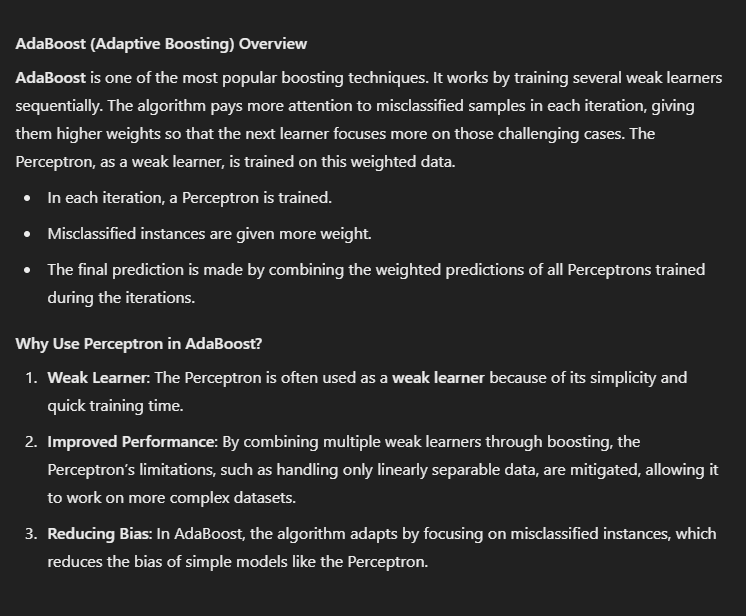

#### Python Implementation of AdaBoost with Perceptron


In [11]:
# Import necessary libraries from scikit-learn
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost implementation
from sklearn.linear_model import Perceptron      # Perceptron (used as a weak learner in AdaBoost)
from sklearn.datasets import make_classification # For creating a synthetic classification dataset
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.metrics import accuracy_score       # To evaluate model performance (accuracy metric)

# Step 1: Generate a synthetic dataset for binary classification
# - n_samples=1000: 1000 data points (samples)
# - n_features=20: Each data point has 20 features (input dimensions)
# - n_informative=15: Out of 20 features, 15 are informative (useful for classification)
# - n_classes=2: Binary classification problem (two classes)
# - random_state=42: Fixing the seed for reproducibility
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and testing sets
# - test_size=0.3: 30% of the dataset will be used for testing, 70% for training
# - random_state=42: Fixing the seed for reproducibility in the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create an AdaBoost classifier with Perceptron as the base estimator (weak learner)
# - base_estimator=Perceptron(max_iter=1000): Perceptron is used as the weak learner, trained with 1000 maximum iterations
# - n_estimators=50: Number of weak learners (Perceptron classifiers) to be trained in AdaBoost
# - algorithm='SAMME': SAMME (Stagewise Additive Modeling using Exponential Loss) is used as it doesn't require predict_proba
# - random_state=42: Fixing the seed for reproducibility in AdaBoost
ada_boost = AdaBoostClassifier(base_estimator=Perceptron(max_iter=1000), n_estimators=50, random_state=42, algorithm='SAMME')

# Step 4: Train the AdaBoost model using the training data
# - AdaBoost sequentially trains multiple Perceptrons, adjusting for misclassified instances in each iteration
ada_boost.fit(X_train, y_train)

# Step 5: Make predictions using the test data
# - Predict the class labels for the test set (X_test) based on the AdaBoost-trained model
y_pred = ada_boost.predict(X_test)

# Step 6: Calculate the accuracy of the model
# - accuracy_score: Compares the predicted labels (y_pred) with the actual labels (y_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 7: Output the accuracy result as a percentage
# - f-string used for formatted output, multiplying accuracy by 100 to convert to percentage
print(f"AdaBoost with Perceptron accuracy: {accuracy * 100:.2f}%")


AdaBoost with Perceptron accuracy: 80.67%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


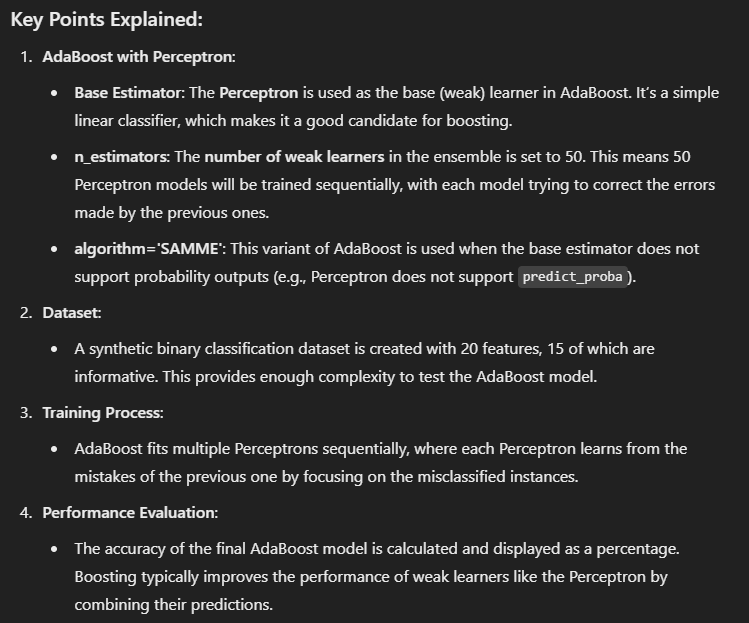